##**Algorithms where Gradient Descent can be applied:**
1. Linear Regression
2. Logistic Regression
3. Neural Networks
4. Support Vector Machines (SVMs)
5. K-means Clustering
6. Matrix Factorization (e.g., Collaborative Filtering)
7. Reinforcement Learning

- For models like **Decision Trees, Random Forests, and KNN**, Gradient Descent is not applicable because these algorithms either don’t have a continuous loss function to optimize, or they work in a completely different way (such as based on discrete decisions or lazy learning).
- For **Naive Bayes**, gradient descent is not commonly used. The model typically learns by direct probability estimation (maximum likelihood estimation), and there is no need to optimize a loss function through gradient descent.

##**Gradient Descent (Perceptron)**

Final Weights: [ 0.2 -0.4]
Bias: -0.6
Predictions: [0 0 0 0 0 0]


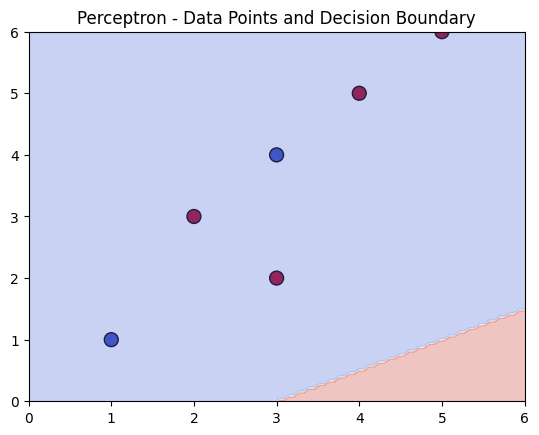

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    # Step function: returns 1 if the input is >= 0, otherwise 0
    def step(self, x):
        return 1 if x >= 0 else 0

    # Train the perceptron using gradient descent
    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent to update weights
        for _ in range(self.n_iterations):
            for i in range(len(X)):
                # Compute the linear output
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.step(linear_output)

                # Update weights and bias if prediction is wrong
                if prediction != y[i]:
                    self.weights += self.learning_rate * (y[i] - prediction) * X[i]
                    self.bias += self.learning_rate * (y[i] - prediction)

    # Predict method to classify new data points
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.step(x) for x in linear_output])

# Create a simple dataset for binary classification
# Features (X)
X = np.array([[2, 3], [1, 1], [3, 2], [5, 6], [4, 5], [3, 4]])
# Labels (y), 0 for negative class and 1 for positive class
y = np.array([1, 0, 1, 1, 1, 0])

# Instantiate and train the Perceptron model
perceptron = Perceptron(learning_rate=0.1, n_iterations=1000)
perceptron.fit(X, y)

# Predict the labels for the dataset
predictions = perceptron.predict(X)

# Print the final weights, bias, and predictions
print("Final Weights:", perceptron.weights)
print("Bias:", perceptron.bias)
print("Predictions:", predictions)

# Plotting the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
plt.title("Perceptron - Data Points and Decision Boundary")

# Create a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 6, 100), np.linspace(0, 6, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()

##**Gradient Descent (Functions)**

Optimal point found: 0.00014272476927059603
Function value at optimal point: 2.0370359763344873e-08


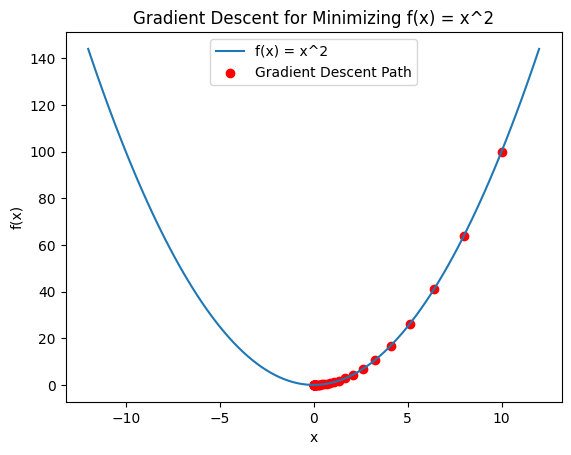

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function you want to minimize (for example, f(x) = x^2)
def func(x):
    return x**2

# Compute the gradient (derivative of f(x) = x^2)
def gradient(x):
    return 2*x

# Gradient Descent function
def gradient_descent(func, gradient, start_point, learning_rate, num_iterations):
    # Store the points for plotting the convergence curve
    points = [start_point]

    x = start_point
    for _ in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad  # Update the value of x
        points.append(x)

    return x, points

# Parameters
start_point = 10.0  # Starting point for gradient descent
learning_rate = 0.1  # Step size for each iteration
num_iterations = 50  # Number of iterations

# Run gradient descent
optimal_x, points = gradient_descent(func, gradient, start_point, learning_rate, num_iterations)

# Print the results
print(f"Optimal point found: {optimal_x}")
print(f"Function value at optimal point: {func(optimal_x)}")

# Plot the function and the path of gradient descent
x_vals = np.linspace(-12, 12, 100)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = x^2")
plt.scatter(points, [func(p) for p in points], color='red', label="Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent for Minimizing f(x) = x^2")
plt.legend()
plt.show()

Optimal point found: -0.3
Function value at optimal point: 1.55


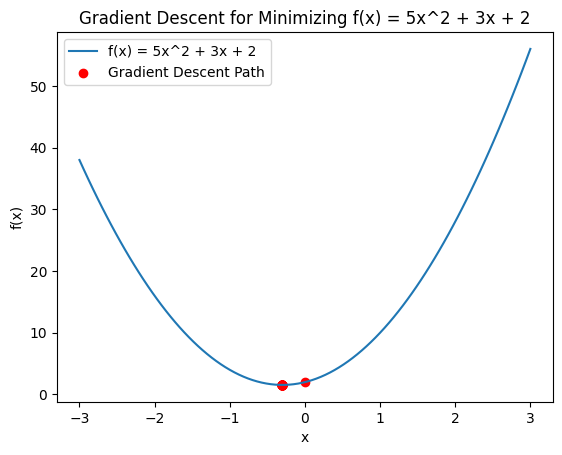

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function: f(x) = 5x^2 + 3x + 2
def func(x):
    return 5 * x**2 + 3 * x + 2

# Compute the gradient of the function: f'(x) = 10x + 3
def gradient(x):
    return 10 * x + 3

# Gradient Descent function
def gradient_descent(func, gradient, start_point, learning_rate, num_iterations):
    # Store the points for plotting the convergence curve
    points = [start_point]

    x = start_point
    for _ in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad  # Update the value of x
        points.append(x)

    return x, points

# Parameters
start_point = 0.0  # Starting point for gradient descent (initial guess)
learning_rate = 0.1  # Step size for each iteration
num_iterations = 50  # Number of iterations

# Run gradient descent
optimal_x, points = gradient_descent(func, gradient, start_point, learning_rate, num_iterations)

# Print the results
print(f"Optimal point found: {optimal_x}")
print(f"Function value at optimal point: {func(optimal_x)}")

# Plot the function and the path of gradient descent
x_vals = np.linspace(-3, 3, 100)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = 5x^2 + 3x + 2")
plt.scatter(points, [func(p) for p in points], color='red', label="Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent for Minimizing f(x) = 5x^2 + 3x + 2")
plt.legend()
plt.show()

##**Gradient Descent (Linear Regression)**

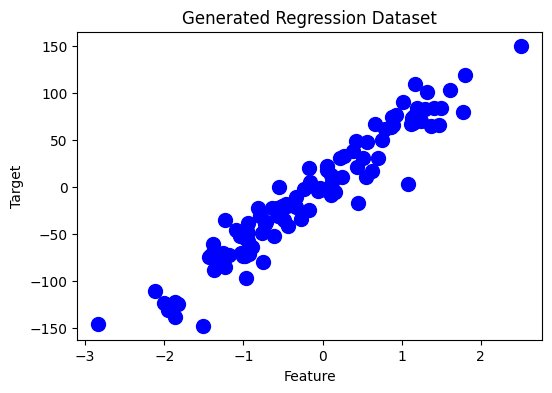

Epoch 0, Cost: 4607.729917566887
Epoch 100, Cost: 338.8623319560774
Epoch 200, Cost: 338.8623319560774
Epoch 300, Cost: 338.8623319560774
Epoch 400, Cost: 338.8623319560774
Epoch 500, Cost: 338.8623319560774
Epoch 600, Cost: 338.8623319560774
Epoch 700, Cost: 338.8623319560774
Epoch 800, Cost: 338.8623319560774
Epoch 900, Cost: 338.8623319560774
Intercept: 1.5892065051903037
Coefficient: 60.68923520023321


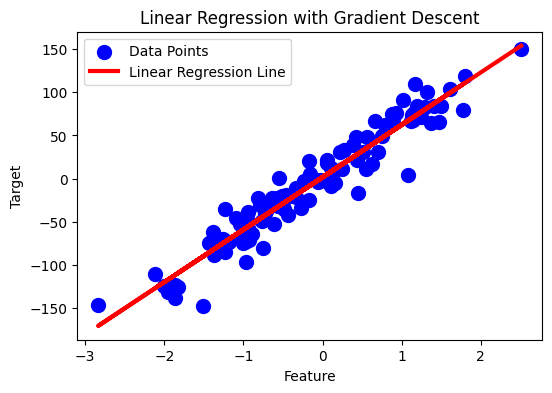

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=41)

# Visualize the data points
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], y, c='blue', s=100, label='Data Points')
plt.title('Generated Regression Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

# Gradient Descent for Linear Regression
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m = len(y)  # Number of samples
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (X0 = 1) for intercept

    # Initialize weights (including intercept)
    weights = np.random.randn(X_b.shape[1])

    # Gradient Descent Loop
    for epoch in range(epochs):
        y_pred = np.dot(X_b, weights)  # Predictions
        errors = y_pred - y  # Errors (y - y_pred)

        # Gradient calculation for all weights
        gradients = (2/m) * X_b.T.dot(errors)

        # Update weights using the gradient
        weights -= lr * gradients

        # Optional: Print cost every 100 iterations for monitoring
        if epoch % 100 == 0:
            cost = np.mean(errors**2)
            print(f"Epoch {epoch}, Cost: {cost}")

    return weights

# Train Linear Regression using Gradient Descent
weights = gradient_descent(X, y, lr=0.1, epochs=1000)

# Extract intercept and coefficients (weights)
intercept = weights[0]
coef = weights[1]

print(f"Intercept: {intercept}")
print(f"Coefficient: {coef}")

# Generate predictions
y_pred = intercept + coef * X

# Visualize the data points and the linear regression line
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], y, c='blue', s=100, label='Data Points')
plt.plot(X[:, 0], y_pred, color='red', linewidth=3, label='Linear Regression Line')
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()